# Import

In [1]:
import os
import pandas as pd
import numpy as np
import importlib
import evaluator
importlib.reload(evaluator) 
from evaluator import ModelEvaluator
import matplotlib.pyplot as plt

# Regular

[34.94153  60.26026  52.48483  58.42227  52.62445  24.499842 78.84604
 53.25211  20.731127 79.048615 32.314297 67.26559  67.32388  63.67196
 71.08399  29.90158  69.31231  47.339    74.32425  50.957527 36.7517
 28.497725 55.4328   35.27495  51.07681  64.490265 29.430948 64.94952
 55.753902 71.64679  58.462635 44.252827 54.032616 55.87956  37.793205
 79.41804  39.316734 78.74422  62.78777  29.037691 56.528526 27.199795
 66.57917  56.10057  64.67161  47.133854 74.291176 44.851906 68.01843
 28.229712 69.99202  70.46992  64.228004 86.97609  80.35581  61.78868
 60.346848 46.633232 23.700474 87.076996 69.32448  61.1787   65.649414
 33.844788 74.76343  75.964424 64.88496  39.240158 52.668602 52.07802
 34.596745 39.78368  60.591328 74.394104 62.613598 79.67437  60.54409
 48.51835  67.18218  55.167507 57.21562  64.305374 56.33816  51.059628
 76.7728  ]
[ 15.        20.000002  27.000002  74.00001   24.999998  32.000004
 203.        93.000015   8.        85.99999  117.00001   68.
  34.000004  27.9

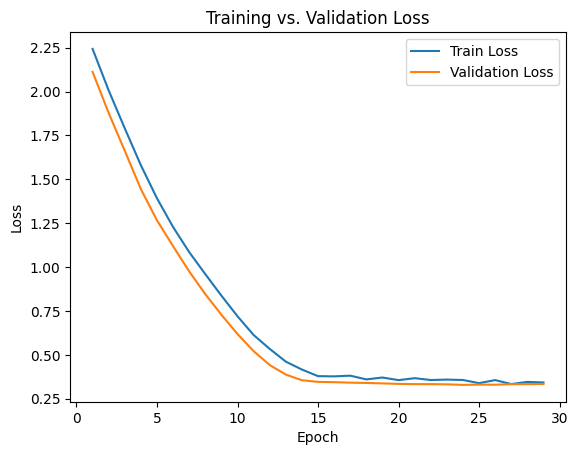

MAE : 37.6056
MSE : 2534.6267
RMSE: 50.3451


{'mae': 37.60564041137695,
 'mse': 2534.626708984375,
 'rmse': np.float64(50.34507631322427)}

In [10]:
import yaml
with open("config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)
    
loss_type = config["loss_type"]
learning_rate = config["lr"]

predictions = np.load("result/predictions_regression best3.npy")
predictions = np.expm1(predictions)  
ground_truth = np.load("result/ground_truth.npy")
ground_truth = np.expm1(ground_truth)

train_log_path = f"./train_logs/train_logs_{loss_type}_lr{learning_rate}.json"


# 建立 evaluator
evaluator = ModelEvaluator(predictions, ground_truth, train_log_path)
# 顯示預測和真實值
print(predictions)
print(ground_truth)

# 畫圖
evaluator.plot_loss_curve()
evaluator.evaluate_metrics()